https://microsoft.github.io/autogen/0.4.0.dev11/user-guide/agentchat-user-guide/quickstart.html


In [2]:
import os

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from dotenv import load_dotenv

load_dotenv()

api_version = os.getenv("AZURE_OPENAI_API_VERSION")
api_key = os.getenv("AZURE_OPENAI_API_KEY")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
azure_openai_chat_completion_client = AzureOpenAIChatCompletionClient(
            model="gpt-4o",
            azure_endpoint=azure_endpoint,
            api_version=api_version,
            api_key=api_key,
        )

# Define a tool
async def get_weather(city: str) -> str:
    return f"The weather in {city} is 73 degrees and Sunny."


async def main() -> None:
    # Define an agent
    weather_agent = AssistantAgent(
        name="weather_agent",
        model_client=azure_openai_chat_completion_client,
        tools=[get_weather],
    )

    # Define a team with a single agent and maximum auto-gen turns of 1.
    agent_team = RoundRobinGroupChat([weather_agent], max_turns=1)

    while True:
        # Get user input from the console.
        user_input = input("Enter a message (type 'exit' to leave): ")
        if user_input.strip().lower() == "exit":
            break
        # Run the team and stream messages to the console.
        stream = agent_team.run_stream(task=user_input)
        await Console(stream)


# NOTE: if running this inside a Python script you'll need to use asyncio.run(main()).
await main()

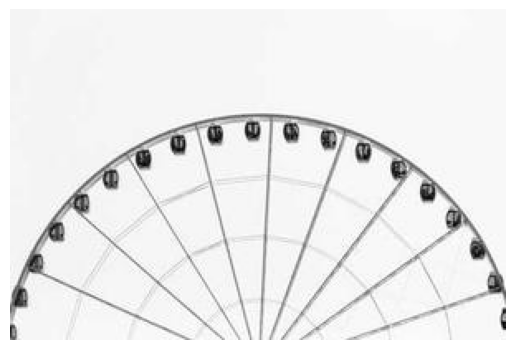

[]
source='assistant' models_usage=RequestUsage(prompt_tokens=238, completion_tokens=58) content='The image shows the upper portion of a Ferris wheel. The Ferris wheel is shown from a low angle, and various passenger cabins are visible along the wheel. The background is a plain, light color, which contrasts with the dark color of the structural elements of the Ferris wheel.' type='TextMessage'


/home/andy/works/openai/autogen04-sample/.venv/lib/python3.11/site-packages/autogen_agentchat/agents/_assistant_agent.py:343: UserWarning: Resolved model mismatch: gpt-4o-2024-08-06 != gpt-4o-2024-05-13. Model mapping may be incorrect.
  result = await self._model_client.create(


In [2]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

from io import BytesIO

import matplotlib.pyplot as plt
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import CancellationToken
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
plt.imshow(pil_image) 
plt.axis('off') 
plt.show()

agent = AssistantAgent(
    name="assistant",
    model_client=azure_openai_chat_completion_client,
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [multi_modal_message],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)



# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

In [3]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken


# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = azure_openai_chat_completion_client
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=15), content=[FunctionCall(id='call_Zb3nDg44yestIyvc9obDdXhm', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_Zb3nDg44yestIyvc9obDdXhm')], type='ToolCallExecutionEvent')]
source='assistant' models_usage=None content='AutoGen is a programming framework for building multi-agent applications.' type='ToolCallSummaryMessage'


/home/andy/works/openai/autogen04-sample/.venv/lib/python3.11/site-packages/autogen_agentchat/agents/_assistant_agent.py:343: UserWarning: Resolved model mismatch: gpt-4o-2024-08-06 != gpt-4o-2024-05-13. Model mapping may be incorrect.
  result = await self._model_client.create(


In [ ]:
from autogen_agentchat.agents import UserProxyAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken


async def user_proxy_run() -> None:
    user_proxy_agent = UserProxyAgent("user_proxy")
    response = await user_proxy_agent.on_messages(
        [TextMessage(content="What is your name? ", source="user")], cancellation_token=CancellationToken()
    )
    print(f"Your name is {response.chat_message.content}")


# Use asyncio.run(user_proxy_run()) when running in a script.
await user_proxy_run()

In [4]:
from autogen_agentchat.ui import Console


async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.on_messages_stream(
    #     [TextMessage(content="Find information on AutoGen", source="user")],
    #     cancellation_token=CancellationToken(),
    # ):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="Find information on AutoGen", source="user")],
            cancellation_token=CancellationToken(),
        )
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- assistant ----------
[FunctionCall(id='call_GxgrYihgcZDFhkIuiAFmKSbe', arguments='{"query":"AutoGen information"}', name='web_search')]
[Prompt tokens: 108, Completion tokens: 16]
---------- assistant ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_GxgrYihgcZDFhkIuiAFmKSbe')]
---------- assistant ----------
AutoGen is a programming framework for building multi-agent applications.
---------- Summary ----------
Number of inner messages: 2
Total prompt tokens: 108
Total completion tokens: 16
Duration: 0.87 seconds
